## Clustering experiment #1
========================

Plan:
-----

 * Derive a vector for left and righthand alignment variance for each contiguous block of text in each article (newspaper has pages, which hold articles, which consist of blocks).
 * Create a k=8 kmeans clustering using data from all newspapers from 1745 to 1756.
 * Visualise the clustering
 * Given the set of found poems, see into which clusters the poems get assigned.
 * Report on the spread of these and if a cluster is found which just has poems, report on all of the references within that cluster.

In [7]:
%matplotlib inline

# Load this library to make the graphs interactive for smaller samples
#import mpld3
#mpld3.enable_notebook()

# Turns out, multiple interactive scattergraphs with 170,000+ points each is a bit too much for a browser
# Who knew?! 

In [1]:
from clustering_capitals import create_cluster_dataset, NewspaperArchive
DBFILE = "1745-55.db"
n = NewspaperArchive(textareas="/datastore/burneytextareas")
a = n.get_areas(newspaper="B0574REMEMBRA", year = "1748", month = "03", day = "05")
pg1a1 = a['0001']['001'][0]

print(len(pg1a1['lines']), len(pg1a1['line_widths'][:len(pg1a1['lines'])-1]))
print(pg1a1['line_widths'][:len(pg1a1['lines'])-1][-1])

Loading /datastore/burneytextareas/B0574REMEMBRA/1748.json from disc
35 34
85


In [2]:
# Get/create the dataset:

ds = create_cluster_dataset(n, daterange = [1745, 1755], dbfile = DBFILE) # , refresh = True)


Loading from db cache '1745-55.db'
254863 vectors loaded.


What do these 'vectors' look like? What do the columns refer to?

In [3]:
data, transform, id_list = ds
print(data)

print(transform.get_feature_names())

  (0, 0)	95.7142857143
  (0, 1)	0.288040949279
  (0, 2)	619.0
  (0, 3)	-1012.875
  (0, 4)	0.625
  (0, 6)	50889.984375
  (0, 8)	240.375
  (0, 9)	58688.109375
  (1, 0)	103.583333333
  (1, 1)	1.11418511066
  (1, 2)	2215.0
  (1, 3)	-1502.92
  (1, 4)	0.48
  (1, 6)	132023.4304
  (1, 8)	125.64
  (1, 9)	131.7536
  (2, 0)	106.5
  (2, 1)	51.25
  (2, 2)	615.0
  (2, 3)	-1554.14285714
  (2, 4)	0.142857142857
  (2, 6)	559.836734694
  (2, 8)	8.14285714286
  (2, 9)	11.5510204082
  (3, 0)	225.571428571
  :	:
  (254859, 1)	0.0190523969205
  (254859, 2)	5051.0
  (254859, 3)	-61.9523809524
  (254859, 4)	0.511904761905
  (254859, 5)	0.178571428571
  (254859, 6)	64127.1070011
  (254859, 8)	236.488095238
  (254859, 9)	8172.23582766
  (254860, 0)	58.9220779221
  (254860, 1)	0.0188308475295
  (254860, 2)	5328.0
  (254860, 3)	-243.705128205
  (254860, 4)	0.628205128205
  (254860, 5)	0.0512820512821
  (254860, 6)	32272.780572
  (254860, 8)	156.961538462
  (254860, 9)	12922.8745891
  (254861, 0)	1563.0
  (254861,

Going from a vector back to the metadata reference:
---------------------------------------------------

By keeping an 'id_list', we can look up the identifier for any vector in the list from the database we've made for this clustering attemp. This lets us look up what the reference for that is, and where we can find it:

In [4]:
from clustering_capitals import ClusterDB
db = ClusterDB(DBFILE)
item = dict(db.vecidtoitem(id_list[1]))
print(item)
print(transform.inverse_transform(data[1]))

from burney_data import BurneyDB
bdb = BurneyDB("burney.db")

titlemd = bdb.get_title_row(titleAbbreviation=item['newspaper'])
entry = bdb.get_entry_row(year=item['year'], month=item['month'], day=item['day'], title_id= titlemd['id'])
issue = bdb.get_issue_row(id=entry['issue_id'])

print(titlemd)
print(issue)
print(entry)

vector = db.vector(id_list[1])

print(dict(vector))

mask = {'ave_lsp': 1.0, 'density':1.0, 'ltcount':0.0, 'redge_x2ave':0.0, 'st_caps':1.0, 
        'st_nums':1.0, 'x1_var1':1.0, 'x1_var2':0.0, 'x1ave_ledge':0.0, 'x2_var1':1.0, 'x2_var2':0.0}

m_vec = transform.transform(mask)

print(m_vec)

{'month': '06', 'article': '001', 'vector_id': 2, 'page': '0001', 'day': '27', 'id': 2, 'newspaper': 'B1308WHITEHAL', 'year': '1747', 'block_number': '1'}
[{'density': 1.114185110663984, 'st_caps': 0.47999999999999998, 'redge_x2ave': -1502.9200000000001, 'x1ave_ledge': 125.63999999999999, 'ave_lsp': 103.58333333333333, 'ltcount': 2215.0, 'x2_var1': 131.75360000000003, 'x1_var1': 132023.43040000004}]
{'titleContinues': '', 'title': 'WHITEHALL JUNE 27 1747 THIS AFTERNOON A MESSENGER ARRIVED', 'placeOfPublication': 'LONDON', 'titleAbbreviation': 'B1308WHITEHAL', 'earliest_issue': None, 'datesOfPublication': '1747', 'id': 1160, 'typeOfPublication': 'NEWSPAPER', 'last_issue': None, 'titleContinuedBy': ''}
{'issueNumber': None, 'title_id': 1160, 'volumeNumber': None, 'ESTC': 'N69936', 'id': 185047, 'printedDate': 'JUNE 27 1747', 'normalisedDate': '1747-06-27', 'pageCount': '7'}
{'month': '06', 'filepath': '/cygdrive/w/APEX/B1308WHITEHAL/1747/06/27/service', 'issue_id': 185047, 'number_of_art

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Mask off leaving just the left and right variance columns
npdata = data.toarray()
mask = np.ones((11), dtype=bool)
# remember: ['ave_lsp', 'density', 'ltcount', 'redge_x2ave', 'st_caps', 
#            'st_nums', 'x1_var1', 'x1_var2', 'x1ave_ledge', 'x2_var1', 'x2_var2']
mask[[0,1,2,3,4,5,7,8,10]] = False

marray = npdata[:,mask]

x1 vs x2 varience?
------------------

What is the rough shape of this data? The varience of x1 and x2 are equivalent to the left and right alignment of the text varies in a given block of text.

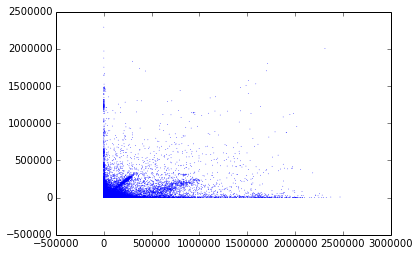

In [ ]:
plt.scatter(marray[:,0], marray[:,1], marker = ".", s = [2] * len(marray), linewidths=[0.0] * len(marray))
plt.show()

Attempting K-Means
==================

What sort of clustering algorithm to employ is actually a good question. K-means can give fairly meaningless responses if the data is of a given sort. Generally, it can be useful but cannot be used blindly. 

Given the data above, it might be a good start however.

In [ ]:
# Build the clustering and show the individual clusters as best we can:
from sklearn.cluster import KMeans

cl_mask = np.ones((11), dtype=bool)
# remember: ['ave_lsp', 'density', 'ltcount', 'redge_x2ave', 'st_caps', 
#            'st_nums', 'x1_var1', 'x1_var2', 'x1ave_ledge', 'x2_var1', 'x2_var2']

# so, we should cluster on ave_lsp, density, st_caps, st_nums, x1_var1, x2_var1:
cl_mask[[2,3,7,8,10]] = False

cl_marray = npdata[:,cl_mask]

estimator = KMeans(n_clusters=12)

clusters = estimator.fit(cl_marray)
labels = estimator.labels_

def isol(label, labels):
    for l in labels.astype(np.float):
        if l != label:
            yield "#444444"
        else:
            yield "#FF3355"

def highlight(label, labels):
    for l in labels.astype(np.float):
        if l != label:
            yield 2
        else:
            yield 4

# plot graphs of ave_lsp vs x2_var1?
for label in set(labels):
    print("Cluster: {0} - x1_var1 vs x2_var2".format(label))
    plt.scatter(cl_marray[:,4], cl_marray[:,5], c=list(isol(label, labels)), marker = ".", 
                s = list(highlight(label, labels)), linewidths=[0.0] * len(marray))
    plt.show()

Cluster: 0 - x1_var1 vs x2_var2


It looks like cluster 4 and perhaps cluster 11 are ones that should contain more complete poems than the rest if our assumptions are correct. Clump with very low x1 (lefthand edge) variance, but high x2 (right hand side).

What do the other aspects of 4 and 11 look like?

Cluster: 4 - ave_lp vs density


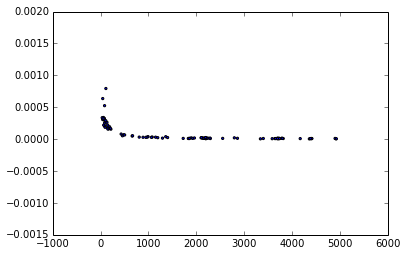

Cluster: 4 - st_caps vs st_num


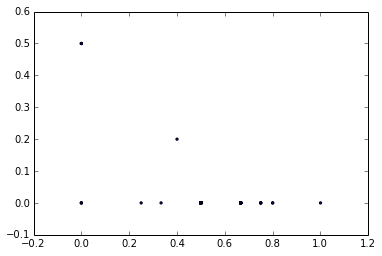

Cluster: 4 - x1_var1 vs x2_var2


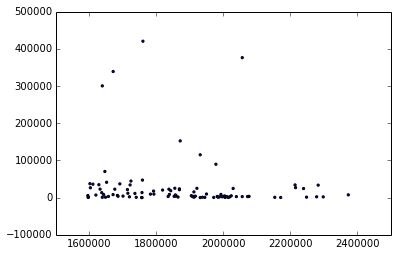

Cluster: 11 - ave_lp vs density


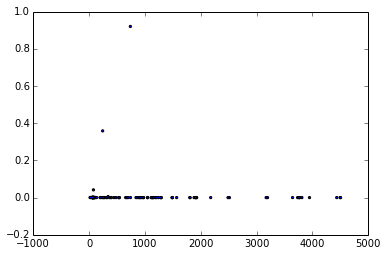

Cluster: 11 - st_caps vs st_num


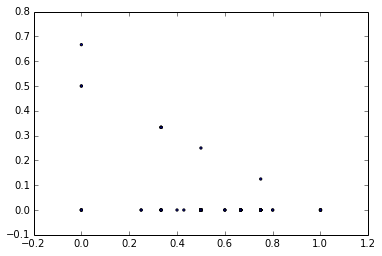

Cluster: 11 - x1_var1 vs x2_var2


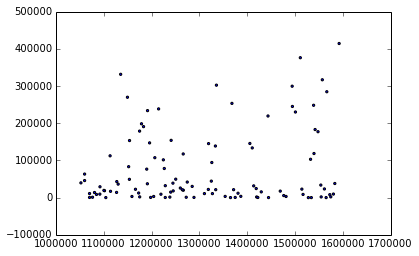

In [9]:
# plot graphs of ave_lsp vs x2_var1?
for label in [4,11]:
    print("Cluster: {0} - ave_lp vs density".format(label))
    plt.scatter(cl_marray[labels == label,0], cl_marray[labels == label,1], marker = ".", linewidths=1)
    plt.show()
    print("Cluster: {0} - st_caps vs st_num".format(label))
    plt.scatter(cl_marray[labels == label,2], cl_marray[labels == label,3], marker = ".", linewidths=1)
    plt.show()
    print("Cluster: {0} - x1_var1 vs x2_var2".format(label))
    plt.scatter(cl_marray[labels == label,4], cl_marray[labels == label,5], marker = ".", linewidths=1)
    plt.show()

Lets export this as a list of references to explore further - "clusterX.csv"

In [11]:
import csv

def get_info(item_id):
    record = dict(db.vecidtoitem(item_id))
    vect = dict(db.vector(item_id))
    titlemd = bdb.get_title_row(titleAbbreviation=record['newspaper'])
    entry = bdb.get_entry_row(year=record['year'], month=record['month'], day=record['day'], title_id= titlemd['id'])
    issue = bdb.get_issue_row(id=entry['issue_id'])
    record.update(titlemd)
    record.update(entry)
    record.update(issue)
    record.update(vect)
    return record

for label in set(labels):
    print("Saving label {0}".format(label))
    with open("exp2_cluster{0}.csv".format(label), "w") as cfn:
        fields = ["title", "titleAbbreviation", "year", "month", "day", 
              "issueNumber", "printedDate", "page", "article", "block_number", "filepath", "st_caps", "st_nums", "x1_var1", "x2_var1", "ltcount"]
        csvdoc = csv.DictWriter(cfn, fieldnames = fields)
        csvdoc.writerow(dict([(x,x) for x in fields]))
        count = 0
        for idx, vlabel in enumerate(list(labels)):
            if idx % 1000 == 0:
                print("Tackling line {0} - saved {1} lines for this label".format(idx, count))
            if vlabel == label:
                record = get_info(id_list[idx])
                csvdoc.writerow(dict([(x,record[x]) for x in fields]))
                count += 1

Saving label 0
Tackling line 0 - saved 0 lines for this label
Tackling line 1000 - saved 26 lines for this label
Tackling line 2000 - saved 48 lines for this label
Tackling line 3000 - saved 75 lines for this label
Tackling line 4000 - saved 96 lines for this label
Tackling line 5000 - saved 122 lines for this label
Tackling line 6000 - saved 161 lines for this label
Tackling line 7000 - saved 190 lines for this label
Tackling line 8000 - saved 218 lines for this label
Tackling line 9000 - saved 267 lines for this label
Tackling line 10000 - saved 298 lines for this label
Tackling line 11000 - saved 330 lines for this label
Tackling line 12000 - saved 360 lines for this label
Tackling line 13000 - saved 382 lines for this label
Tackling line 14000 - saved 420 lines for this label
Tackling line 15000 - saved 459 lines for this label
Tackling line 16000 - saved 475 lines for this label
Tackling line 17000 - saved 510 lines for this label
Tackling line 18000 - saved 531 lines for this lab